##### Import packages

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
import string

##### Import the dataset

In [3]:
df = pd.read_csv(r"D:\LEARNING\WELLS FARGO\NLP\CFPB\Data\complaints-2023-08-29_03_42.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921585 entries, 0 to 921584
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date received                 921585 non-null  object 
 1   Product                       921585 non-null  object 
 2   Sub-product                   921564 non-null  object 
 3   Issue                         921585 non-null  object 
 4   Sub-issue                     875123 non-null  object 
 5   Consumer complaint narrative  387120 non-null  object 
 6   Company public response       538027 non-null  object 
 7   Company                       921585 non-null  object 
 8   State                         919397 non-null  object 
 9   ZIP code                      921403 non-null  object 
 10  Tags                          81082 non-null   object 
 11  Consumer consent provided?    879543 non-null  object 
 12  Submitted via                 921585 non-nul

In [5]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,02/06/23,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,MA,01570,Older American,Consent not provided,Web,02/06/23,Closed with explanation,Yes,NaN,6521596
1,03/26/23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Personal information incorrect,NaN,NaN,"EQUIFAX, INC.",TX,75002,NaN,Consent not provided,Web,03/26/23,Closed with explanation,Yes,NaN,6751978
2,09/13/22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,Hi I am submitting this XXXX XXXX this isn't a...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,60586,NaN,Consent provided,Web,09/13/22,Closed with non-monetary relief,Yes,NaN,5978090
3,03/29/23,Mortgage,Other type of mortgage,Applying for a mortgage or refinancing an exis...,NaN,"I applied for, Again for a Pre-approval on a P...",Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",PA,XXXXX,NaN,Consent provided,Web,03/29/23,Closed with explanation,Yes,NaN,6762421
4,03/28/23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Problem with personal statement of dispute,there investigation found that the information...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,VA,22193,NaN,Consent provided,Web,03/28/23,Closed with non-monetary relief,Yes,NaN,6765663


##### Filtering the relevant columns

In [6]:
df = df[['Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative']]

In [7]:
#Renaming the filtered columns
df = df.rename(columns={"Product": "product", "Sub-product": "subproduct", "Issue": "issue", "Sub-issue": "subissue", "Consumer complaint narrative": "narrative"})

##### Data Inspection

In [9]:
df.shape

(921585, 5)

In [29]:
#Check for na values in narrative columns
df['narrative'].isna().sum()

534465

In [37]:
#Removing the rows having nan values in narrative column
df = df[df['narrative'].notna()]
df =df.reset_index(drop=True)
df.shape

(387120, 5)

In [38]:
df['product'].value_counts()

product
Credit reporting, credit repair services, or other personal consumer reports    274742
Debt collection                                                                  31685
Credit card or prepaid card                                                      23842
Checking or savings account                                                      22374
Mortgage                                                                         12746
Money transfer, virtual currency, or money service                                8291
Vehicle loan or lease                                                             5778
Student loan                                                                      4171
Payday loan, title loan, or personal loan                                         3491
Name: count, dtype: int64

In [39]:
df['subproduct'].value_counts()

subproduct
Credit reporting                              272015
General-purpose credit card or charge card     18562
Checking account                               18465
Other debt                                      9346
Conventional home mortgage                      7321
Credit card debt                                7309
I do not know                                   7088
Loan                                            4926
Medical debt                                    4661
Mobile or digital wallet                        3207
Store credit card                               3200
Federal student loan servicing                  3034
FHA mortgage                                    2587
Domestic (US) money transfer                    2328
Savings account                                 1934
Other personal consumer report                  1859
Installment loan                                1709
Other banking product or service                1648
Auto debt                          

In [40]:
df['issue'].value_counts()

issue
Improper use of your report                                                         97800
Incorrect information on your report                                                96308
Problem with a credit reporting company's investigation into an existing problem    77641
Attempts to collect debt not owed                                                   15890
Managing an account                                                                 12564
                                                                                    ...  
Problem with cash advance                                                              12
Incorrect exchange rate                                                                12
Was approved for a loan, but didn't receive money                                       7
Problem with an overdraft                                                               1
Property was damaged or destroyed property                                              1
Name

In [41]:
df['subissue'].value_counts()

subissue
Reporting company used your report improperly                  82221
Information belongs to someone else                            62139
Their investigation did not fix an error on your report        51412
Credit inquiries on your report that you don't recognize       14915
Account information incorrect                                  12377
                                                               ...  
Trouble using the card to send money to another person             6
Problem with a check written from your prepaid card account        4
Threatened to turn you in to immigration or deport you             4
Was signed up for overdraft on card, but don't want to be          1
Qualified for a better loan than the one offered                   1
Name: count, Length: 162, dtype: int64

In [42]:
#Inspect the first row
print(df.iloc[0])
text = df['narrative'][0]
text

product       Credit reporting, credit repair services, or o...
subproduct                                     Credit reporting
issue                      Incorrect information on your report
subissue                    Information belongs to someone else
narrative     Hi I am submitting this XXXX XXXX this isn't a...
Name: 0, dtype: object


"Hi I am submitting this XXXX XXXX this isn't any influence and this is not a third party. TransUnion has low and unfair credit number for me in their report. I have complained. The problem has not been resolved. my fico has me at a credit score over 719transunion has me at a score around 590. That is a huge difference. transunion paints me as a XXXX. my fico say I have good credit. What the heck is going on here. i have almost no debt and my identity was stolen causing my score to drop n i made this clear for 60 days straight with transunion i spoke to a representative agent name XXXX and XXXX and XXXX from the fraud department I prefer to speak to a us rept but they refused they had me on mute for 4 hours which was hurtful I have a perfect repayment record. I have very low credit utilization. I have three negative credit items outstanding debt now. I have modest but ok income. Social Security. Something is wrong with Transunion. I do not understand why they are abusing consumers .Thi

##### Data Preparation

In [43]:
#Function to tokenize and remove the stop words
stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list += ["''", '""', '...', '``']

In [44]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
def process_narrative(narrative):
    tokens = nltk.word_tokenize(narrative)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    return stopwords_removed  

In [48]:
text_words = process_narrative(text)
text_words[0:10]

['hi',
 'submitting',
 'xxxx',
 'xxxx',
 "n't",
 'influence',
 'third',
 'party',
 'transunion',
 'low']

In [49]:
# Add to stopwords list
stopwords_list += ['--', 'xxxx']

In [50]:
# Check out word counts

text_words = process_narrative(text)

word_counts = {}
for i in range(len(text_words)):
    word_counts[text_words[i]] = text_words.count(text_words[i])
word_counts

{'hi': 1,
 'submitting': 1,
 "n't": 1,
 'influence': 1,
 'third': 1,
 'party': 1,
 'transunion': 6,
 'low': 2,
 'unfair': 1,
 'credit': 5,
 'number': 1,
 'report': 2,
 'complained': 1,
 'problem': 1,
 'resolved': 1,
 'fico': 2,
 'score': 3,
 '719transunion': 1,
 'around': 1,
 '590': 1,
 'huge': 1,
 'difference': 1,
 'paints': 1,
 'say': 1,
 'good': 1,
 'heck': 1,
 'going': 1,
 'almost': 1,
 'debt': 2,
 'identity': 1,
 'stolen': 1,
 'causing': 2,
 'drop': 1,
 'n': 8,
 'made': 1,
 'clear': 1,
 '60': 1,
 'days': 1,
 'straight': 1,
 'spoke': 1,
 'representative': 1,
 'agent': 1,
 'name': 1,
 'fraud': 1,
 'department': 1,
 'prefer': 1,
 'speak': 1,
 'us': 1,
 'rept': 1,
 'refused': 2,
 'mute': 1,
 '4': 1,
 'hours': 1,
 'hurtful': 1,
 'perfect': 1,
 'repayment': 1,
 'record': 2,
 'utilization': 1,
 'three': 1,
 'negative': 1,
 'items': 1,
 'outstanding': 1,
 'modest': 1,
 'ok': 1,
 'income': 1,
 'social': 1,
 'security': 1,
 'something': 1,
 'wrong': 1,
 'understand': 1,
 'abusing': 1,
 'con

It seems there are a lot of numbers. Update function to get rid of numbers from the list.

Note: this function also gets rid of strings with punctuation in it like 'xx/xx/xxxx' or "n't".

In [53]:
def process_narrative(narrative):
    tokens = nltk.word_tokenize(narrative)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    
    # adding line to remove all tokens with numbers and punctuation
    stopwords_punc_and_numbers_removed = [word for word in stopwords_removed if word.isalpha()]
    
    return stopwords_punc_and_numbers_removed  

In [54]:
# Redoing processing with updated function
text_words = process_narrative(text)

In [55]:
# make dictionaryof word counts
FreqDist(text_words)

FreqDist({'n': 8, 'transunion': 6, 'credit': 5, 'score': 3, 'low': 2, 'report': 2, 'fico': 2, 'debt': 2, 'causing': 2, 'refused': 2, ...})

In [56]:
type(FreqDist(text_words))

nltk.probability.FreqDist

In [57]:
FreqDist(text_words).most_common(10)

[('n', 8),
 ('transunion', 6),
 ('credit', 5),
 ('score', 3),
 ('low', 2),
 ('report', 2),
 ('fico', 2),
 ('debt', 2),
 ('causing', 2),
 ('refused', 2)]

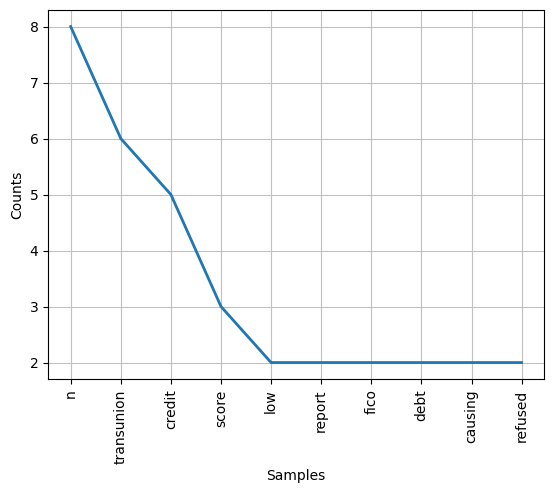

<Axes: xlabel='Samples', ylabel='Counts'>

In [58]:
FreqDist(text_words).plot(10)

In [62]:
#Trying process on the next two rows
df.iloc[1][0:4]

product                                                Mortgage
subproduct                               Other type of mortgage
issue         Applying for a mortgage or refinancing an exis...
subissue                                                    NaN
Name: 1, dtype: object

In [63]:
text = df['narrative'][1]
text

"I applied for, Again for a Pre-approval on a Property in order to be able to view, several properties, in order to be able to use an make a Consumer Credit Transaction, to purchase myself a home. After Filing a report with this agency back in, I think it was XX/XX/XXXX, Pertaining to this same agency. Bank of America, I recieved a respone letter and Call, some time after this, saying that, 'Bank of America , had, 'Pre-approved me for a Mortgage, and that I never responded. The Asociate ask me to come back in to a BOFA and reapply. I went to, XXXX XXXX XXXX, XXXX, Pa XXXX, XX/XX/XXXX. I spoke to an Asociate, by the name of, XXXX XXXX show him the response letter, showing that I I was, previously Pre-Approved, He said, that the letter doesn't mean a thing, and that bank, often send out letters like this to their customers. XXXX XXXX said he Could Not assist me, so he put me in touch with, XXXX. XXXX XXXX, in the mortgage department. XXXX XXXX said, he Could Not assist me, said my, 'cred

In [64]:
text_words = process_narrative(text)

In [65]:
FreqDist(text_words).most_common(30)

[('credit', 4),
 ('said', 4),
 ('assist', 4),
 ('bank', 3),
 ('letter', 3),
 ('mortgage', 3),
 ('bofa', 3),
 ('told', 3),
 ('order', 2),
 ('able', 2),
 ('consumer', 2),
 ('agency', 2),
 ('back', 2),
 ('america', 2),
 ('asociate', 2),
 ('spoke', 2),
 ('could', 2),
 ('score', 2),
 ('low', 2),
 ('policy', 2),
 ('applied', 1),
 ('property', 1),
 ('view', 1),
 ('several', 1),
 ('properties', 1),
 ('use', 1),
 ('make', 1),
 ('transaction', 1),
 ('purchase', 1),
 ('home', 1)]

In [66]:
df.iloc[2][0:4]

product       Credit reporting, credit repair services, or o...
subproduct                                     Credit reporting
issue         Problem with a credit reporting company's inve...
subissue             Problem with personal statement of dispute
Name: 2, dtype: object

In [67]:
text = df['narrative'][2]
text_words = process_narrative(text)
FreqDist(text_words).most_common(30)

[('investigation', 1),
 ('found', 1),
 ('information', 1),
 ('disputed', 1),
 ('inaccurate', 1),
 ('verified', 1),
 ('notice', 1),
 ('say', 1),
 ('also', 1),
 ('state', 1),
 ('corrections', 1),
 ('furnisher', 1),
 ('providing', 1),
 ('credit', 1),
 ('reporting', 1),
 ('companies', 1),
 ('fix', 1)]

##### Combine categories and create new dataframes

In [69]:
# Inspect products again
df['product'].value_counts()

product
Credit reporting, credit repair services, or other personal consumer reports    274742
Debt collection                                                                  31685
Credit card or prepaid card                                                      23842
Checking or savings account                                                      22374
Mortgage                                                                         12746
Money transfer, virtual currency, or money service                                8291
Vehicle loan or lease                                                             5778
Student loan                                                                      4171
Payday loan, title loan, or personal loan                                         3491
Name: count, dtype: int64

- Rename "credit_reporting"
- Rename "debt_collection"
- Rename "credit_card"
- Rename "mortgage"
- Combine "checking" and "money transfer" into "retail_banking"
- Combine the loans into "loans"

In [70]:
df['product'].replace({'Credit reporting, credit repair services, or other personal consumer reports': 'credit_reporting',
                       'Debt collection': 'debt_collection',
                       'Credit card or prepaid card': 'credit_card',
                       'Mortgage': 'mortgage',
                       'Checking or savings account': 'retail_banking',
                       'Money transfer, virtual currency, or money service': 'retail_banking',
                       'Vehicle loan or lease': 'loans',
                       'Payday loan, title loan, or personal loan': 'loans',
                       'Student loan': 'loans'}, inplace=True)

In [71]:
df['product'].value_counts()

product
credit_reporting    274742
debt_collection      31685
retail_banking       30665
credit_card          23842
loans                13440
mortgage             12746
Name: count, dtype: int64

In [72]:
#Mortgage and loans are the smallest. Since they're both types of loans, combine them.
df['product'].replace({'mortgage': 'mortgages_and_loans',
                       'loans': 'mortgages_and_loans'}, inplace=True)
df['product'].value_counts()

product
credit_reporting       274742
debt_collection         31685
retail_banking          30665
mortgages_and_loans     26186
credit_card             23842
Name: count, dtype: int64

In [73]:
# Create new subsets of the data frame in each product category
credit_reporting_df = df[df['product'] == 'credit_reporting']
debt_collection_df = df[df['product'] == 'debt_collection']
mortgages_and_loans_df = df[df['product'] == 'mortgages_and_loans']
credit_card_df = df[df['product'] == 'credit_card']
retail_banking_df = df[df['product'] == 'retail_banking']

In [74]:
#Concatenate all the narratives into a single string per class
def concat_narratives(df):
    # concat narratives
    narr = ''
    for i in range(len(df)):
        narr += df.iloc[i]['narrative']
    print('Finished Concatenation')
    return narr

In [75]:
credit_reporting_text = concat_narratives(credit_reporting_df)
credit_reporting_text_processed = process_narrative(credit_reporting_text)

Finished Concatenation


In [76]:
debt_collection_text = concat_narratives(debt_collection_df)
debt_collection_text_processed = process_narrative(debt_collection_text)

Finished Concatenation


In [77]:
mortgages_and_loans_text = concat_narratives(mortgages_and_loans_df)
mortgages_and_loans_text_processed = process_narrative(mortgages_and_loans_text)

Finished Concatenation


In [78]:
credit_card_text = concat_narratives(credit_card_df)
credit_card_text_processed = process_narrative(credit_card_text)

Finished Concatenation


In [79]:
retail_banking_text = concat_narratives(retail_banking_df)
retail_banking_text_processed = process_narrative(retail_banking_text)

Finished Concatenation


In [81]:
#Saving the text files
text_file = open(r'D:\LEARNING\WELLS FARGO\NLP\CFPB\Data\credit_reporting_text.txt', 'w')
text_file.write(credit_reporting_text)
text_file.close()

In [82]:
text_file = open(r'D:\LEARNING\WELLS FARGO\NLP\CFPB\Data\debt_collection_text.txt', 'w')
text_file.write(debt_collection_text)
text_file.close()

In [83]:
text_file = open(r'D:\LEARNING\WELLS FARGO\NLP\CFPB\Data\mortgages_and_loans_text.txt', 'w')
mortgages_and_loans_text = mortgages_and_loans_text.replace('\x82', '')
text_file.write(mortgages_and_loans_text)
text_file.close()

In [84]:
text_file = open(r'D:\LEARNING\WELLS FARGO\NLP\CFPB\Data\credit_card_text.txt', 'w')
text_file.write(credit_card_text)
text_file.close()

In [85]:
text_file = open(r'D:\LEARNING\WELLS FARGO\NLP\CFPB\Data\retail_banking_text.txt', 'w')
text_file.write(retail_banking_text)
text_file.close()

In [86]:
#Saving the processed text (lists) files

In [87]:
temp = pd.DataFrame(credit_reporting_text_processed)
temp.to_csv(r'D:\LEARNING\WELLS FARGO\NLP\CFPB\Data\credit_reporting_text_processed.csv')

In [88]:
temp = pd.DataFrame(debt_collection_text_processed)
temp.to_csv(r'D:\LEARNING\WELLS FARGO\NLP\CFPB\Data\debt_collection_text_processed.csv')

In [89]:
temp = pd.DataFrame(mortgages_and_loans_text_processed)
temp.to_csv(r'D:\LEARNING\WELLS FARGO\NLP\CFPB\Data\mortgages_and_loans_text_processed.csv')

In [90]:
temp = pd.DataFrame(credit_card_text_processed)
temp.to_csv(r'D:\LEARNING\WELLS FARGO\NLP\CFPB\Data\credit_card_text_processed.csv')

In [91]:
temp = pd.DataFrame(retail_banking_text_processed)
temp.to_csv(r'D:\LEARNING\WELLS FARGO\NLP\CFPB\Data\retail_banking_text_processed.csv')

In [92]:
##### Checking the frequency distribution

In [93]:
FreqDist(debt_collection_text_processed).most_common(30)

[('debt', 58768),
 ('credit', 45284),
 ('account', 36059),
 ('information', 24282),
 ('report', 23034),
 ('company', 21479),
 ('collection', 20944),
 ('consumer', 17379),
 ('received', 14866),
 ('never', 14156),
 ('reporting', 13884),
 ('letter', 13323),
 ('sent', 12801),
 ('also', 12384),
 ('would', 10763),
 ('amount', 10271),
 ('number', 9507),
 ('alleged', 9205),
 ('pay', 9179),
 ('called', 8800),
 ('agency', 8757),
 ('told', 8536),
 ('payment', 8432),
 ('name', 8337),
 ('phone', 8162),
 ('provide', 7943),
 ('please', 7939),
 ('call', 7920),
 ('accounts', 7784),
 ('paid', 7764)]

In [94]:
FreqDist(credit_reporting_text_processed).most_common(30)

[('credit', 624327),
 ('account', 472320),
 ('information', 408397),
 ('reporting', 403459),
 ('consumer', 394015),
 ('report', 384775),
 ('section', 307141),
 ('states', 192128),
 ('accounts', 167040),
 ('agency', 160952),
 ('also', 139537),
 ('without', 133534),
 ('xxxxxxxx', 132378),
 ('balance', 129061),
 ('rights', 127894),
 ('items', 122870),
 ('please', 118043),
 ('act', 116686),
 ('date', 116516),
 ('written', 116458),
 ('fair', 115488),
 ('violated', 115362),
 ('privacy', 108216),
 ('furnish', 106570),
 ('number', 97906),
 ('right', 94683),
 ('inaccurate', 92684),
 ('remove', 90596),
 ('identity', 87577),
 ('accordance', 86745)]

In [95]:
FreqDist(credit_card_text_processed).most_common(30)

[('card', 52995),
 ('credit', 49626),
 ('account', 40450),
 ('bank', 20984),
 ('payment', 18681),
 ('would', 18538),
 ('told', 15366),
 ('received', 15222),
 ('called', 15214),
 ('one', 15070),
 ('balance', 12247),
 ('back', 11611),
 ('time', 11589),
 ('never', 11502),
 ('made', 11062),
 ('said', 10416),
 ('charges', 10173),
 ('information', 10124),
 ('charge', 9999),
 ('dispute', 9723),
 ('call', 9672),
 ('company', 9506),
 ('get', 9097),
 ('number', 8952),
 ('pay', 8816),
 ('sent', 8720),
 ('due', 8651),
 ('could', 8584),
 ('interest', 8445),
 ('also', 8435)]

In [96]:
FreqDist(retail_banking_text_processed).most_common(30)

[('account', 93717),
 ('bank', 56758),
 ('money', 35786),
 ('would', 24313),
 ('told', 23058),
 ('check', 20811),
 ('funds', 20556),
 ('back', 18953),
 ('called', 17988),
 ('received', 16977),
 ('said', 15811),
 ('card', 15281),
 ('sent', 14369),
 ('fraud', 14190),
 ('get', 13838),
 ('number', 13654),
 ('time', 13198),
 ('phone', 12985),
 ('could', 12929),
 ('call', 12795),
 ('days', 12718),
 ('chase', 12380),
 ('email', 12370),
 ('one', 12359),
 ('information', 11905),
 ('checking', 11831),
 ('never', 11696),
 ('also', 11107),
 ('made', 11096),
 ('transfer', 10904)]

In [97]:
FreqDist(mortgages_and_loans_text_processed).most_common(30)

[('loan', 47614),
 ('payment', 36156),
 ('mortgage', 30686),
 ('would', 27354),
 ('payments', 24645),
 ('account', 23448),
 ('told', 20999),
 ('credit', 20702),
 ('received', 17914),
 ('time', 16517),
 ('company', 15642),
 ('called', 14782),
 ('pay', 14426),
 ('bank', 14409),
 ('get', 14123),
 ('sent', 13836),
 ('due', 13734),
 ('back', 13703),
 ('amount', 13473),
 ('information', 13321),
 ('paid', 12944),
 ('made', 12721),
 ('also', 11943),
 ('home', 11890),
 ('call', 11745),
 ('never', 11741),
 ('said', 11730),
 ('could', 10763),
 ('interest', 10285),
 ('since', 9772)]